In [22]:
import random
import numpy as np 

def collision_handler(total_size, size_list=None):
    if size_list is None:
        size_list = []
        
    if total_size > 210e-9:
        first_size = random.choice(np.array([30, 60, 90, 120, 150, 180]) * 1e-9)
        print(f"first size={first_size}")
        total_size = total_size - first_size
        print(f"total size={total_size}")
        collision_handler(total_size)
    else:
        first_size = total_size
        size_list.append(first_size)
    return size_list

total_size = 890e-9

collision_handler(total_size)    

first size=1.5000000000000002e-07
total size=7.399999999999999e-07
first size=1.8000000000000002e-07
total size=5.599999999999999e-07
first size=1.8000000000000002e-07
total size=3.799999999999999e-07
first size=3.0000000000000004e-08
total size=3.4999999999999993e-07
first size=3.0000000000000004e-08
total size=3.199999999999999e-07
first size=1.5000000000000002e-07
total size=1.6999999999999988e-07


In [45]:
import numpy as np
import pandas as pd
import random
from scipy.stats import chi

def collision_handler(total_size, size_list=None):
    if size_list is None:
        size_list = []
        
    if total_size > 210e-9:
        first_size = random.choice(np.array([30, 60, 90, 120, 150, 180]) * 1e-9)
        total_size = total_size - first_size
        collision_handler(total_size, size_list)
    else:
        first_size = total_size
        size_list.append(first_size)
    return size_list

crystal_size = 30e-9
crystal_per_loop = 54

rpm = 120
loops_num = 14 * rpm

crystal_array = np.array([])
df = 3
new_crystals = np.ones(crystal_per_loop) * crystal_size
for _ in range(loops_num):
    crystal_array = np.append(crystal_array, new_crystals)
    np.random.shuffle(crystal_array)
    crystal_series = pd.Series(crystal_array, copy=True)

    x = np.arange(1, len(crystal_array))
    probabils = chi.pdf(x, df, round(len(crystal_array) / 35), len(crystal_array)/10)
    if sum(probabils) < 1:
        probabils[0] += 1 - sum(probabils) 
    num_to_remove = np.random.choice(x, size=1, p=probabils)
    
    if num_to_remove % 2 != 0:
        num_to_remove += 1
        
    indx_to_remove = random.sample(list(crystal_series.index), num_to_remove.item())
    
    crystals_to_merge = np.array(crystal_series[indx_to_remove], copy=True)
    np.random.shuffle(crystals_to_merge)
    crystals_paired = crystals_to_merge.reshape([-1, 2])
    crystals_merged = []
    for pair in crystals_paired:
        if (pair[0] == 210e-9) or (pair[1] == 210e-9) or(pair[0] + pair[1] > 210e-9):
            destruction_result = collision_handler(np.sum(pair))
            crystals_merged.extend(destruction_result)
        else:
            new_crystal = pair[0] + pair[1]
            crystals_merged.append(new_crystal)
    crystals_merged = np.array(crystals_merged)
    
    crystal_series = crystal_series.drop(indx_to_remove)    
    crystal_array = np.append(crystals_merged, crystal_series.to_numpy(copy=True))


(array([175.,  58.,  47.,  29.,  33.,  30.,  42.]),
 array([3.00000000e-08, 5.57142857e-08, 8.14285714e-08, 1.07142857e-07,
        1.32857143e-07, 1.58571429e-07, 1.84285714e-07, 2.10000000e-07]),
 <BarContainer object of 7 artists>)

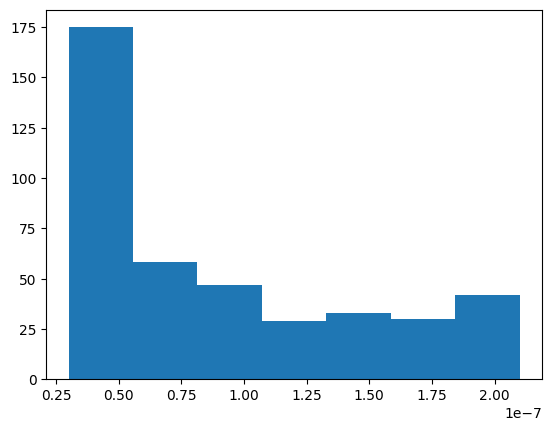

In [46]:
import matplotlib.pyplot as plt
plt.hist(crystal_array, bins=7)


In [47]:
len(crystal_array)

414

In [29]:
loops_num * 54

90720

In [17]:
import xlwings as xw
xw.view(data)

In [20]:
data.iloc[[0, 1]]

0    1
1    2
dtype: int64

In [18]:
data.max()

0.0013495800000000043

In [19]:
data.min()

3e-08

In [20]:
data.median()

6e-08

In [21]:
data.mean()

8.222356495468291e-06